<a href="https://colab.research.google.com/github/gc2321/3235-Machine-Learning/blob/main/Week_09%20-%20Neural%20Net%20Exercises/neural_net_mnist_exercise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import sys
assert sys.version_info >= (3, 7)


In [2]:
from packaging import version
import sklearn
assert version.parse(sklearn.__version__) >= version.parse("1.0.1")

In [3]:
import tensorflow as tf
assert version.parse(tf.__version__) >= version.parse("2.8.0")

In [4]:
import matplotlib.pyplot as plt

plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

In [5]:
tf.keras.backend.clear_session()
tf.random.set_seed(42)

In [6]:
# load data
(X_train_full, y_train_full), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [7]:
X_train_full.shape

(60000, 28, 28)

In [8]:
X_train_full.dtype

dtype('uint8')

In [10]:
# scale the pixel intensities down to the 0-1 range and convert them to floats, by dividing by 255
X_valid, X_train = X_train_full[:5000] / 255., X_train_full[5000:] / 255.
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.

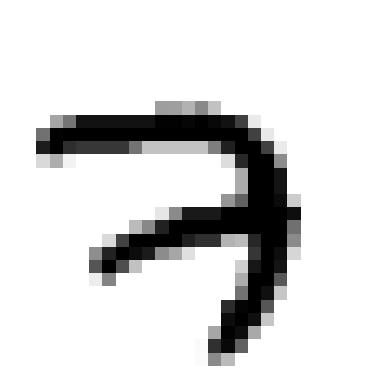

In [12]:
plt.imshow(X_train[0], cmap="binary")
plt.axis('off')
plt.show()

In [13]:
y_train

array([7, 3, 4, ..., 5, 6, 8], dtype=uint8)

In [14]:
X_valid.shape

(5000, 28, 28)

In [15]:
X_test.shape

(10000, 28, 28)

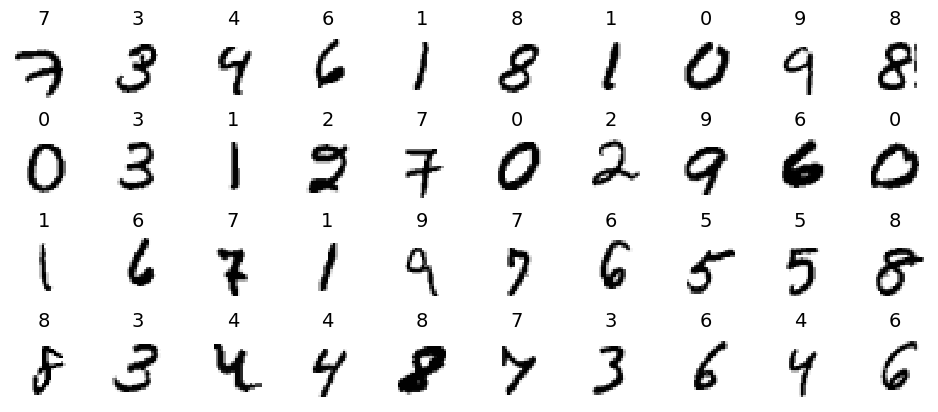

In [16]:
n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(y_train[index])
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

In [17]:
K = tf.keras.backend

class ExponentialLearningRate(tf.keras.callbacks.Callback):
    def __init__(self, factor):
        self.factor = factor
        self.rates = []
        self.losses = []
    def on_batch_end(self, batch, logs):
        self.rates.append(K.get_value(self.model.optimizer.learning_rate))
        self.losses.append(logs["loss"])
        K.set_value(self.model.optimizer.learning_rate, self.model.optimizer.learning_rate * self.factor)

In [19]:
import numpy as np
tf.keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [20]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=[28, 28]),
    tf.keras.layers.Dense(300, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

In [21]:
optimizer = tf.keras.optimizers.SGD(learning_rate=1e-3)
model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer,
              metrics=["accuracy"])
expon_lr = ExponentialLearningRate(factor=1.005)

In [23]:
history = model.fit(X_train, y_train, epochs=1,
                    validation_data=(X_valid, y_valid),
                    callbacks=[expon_lr])

1719/1719 [==============================] - 10s 6ms/step - loss: nan - accuracy: 0.5841 - val_loss: nan - val_accuracy: 0.0958


Text(0, 0.5, 'Loss')

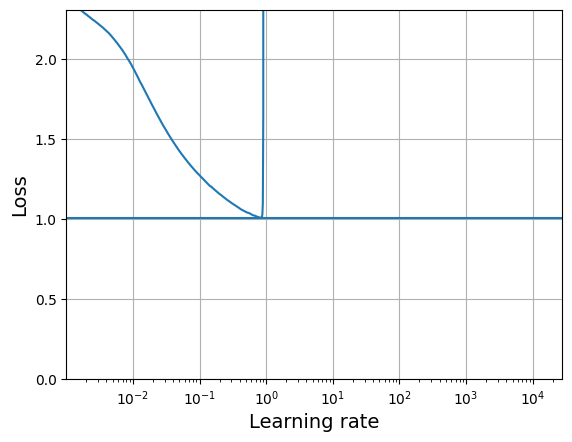

In [25]:
plt.plot(expon_lr.rates, expon_lr.losses)
plt.gca().set_xscale('log')
plt.hlines(min(expon_lr.losses), min(expon_lr.rates), max(expon_lr.rates))
plt.axis([min(expon_lr.rates), max(expon_lr.rates), 0, expon_lr.losses[0]])
plt.grid()
plt.xlabel("Learning rate")
plt.ylabel("Loss")

In [45]:
tf.keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [46]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=[28, 28]),
    tf.keras.layers.Dense(300, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

In [47]:
optimizer = tf.keras.optimizers.SGD(learning_rate=3e-1)
model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer,
              metrics=["accuracy"])

In [53]:
if "google.colab" in sys.modules:  # extra code
    %pip install -q -U tensorboard-plugin-profile

In [48]:
from pathlib import Path

IMAGES_PATH = Path() / "images" / "ann"
IMAGES_PATH.mkdir(parents=True, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = IMAGES_PATH / f"{fig_id}.{fig_extension}"
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [49]:
run_index = 1 # increment this at every run
run_logdir = Path() / "my_mnist_logs" / "run_{:03d}".format(run_index)
run_logdir

PosixPath('my_mnist_logs/run_001')

In [50]:
early_stopping_cb = tf.keras.callbacks.EarlyStopping(patience=20)
checkpoint_cb = tf.keras.callbacks.ModelCheckpoint("my_mnist_model", save_best_only=True)
tensorboard_cb = tf.keras.callbacks.TensorBoard(run_logdir)

history = model.fit(X_train, y_train, epochs=100,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb, early_stopping_cb, tensorboard_cb])

Epoch 1/100
1719/1719 [==============================] - 11s 6ms/step - loss: 0.2336 - accuracy: 0.9273 - val_loss: 0.1089 - val_accuracy: 0.9672
Epoch 2/100
1719/1719 [==============================] - 9s 5ms/step - loss: 0.0946 - accuracy: 0.9710 - val_loss: 0.0955 - val_accuracy: 0.9740
Epoch 3/100
1719/1719 [==============================] - 11s 6ms/step - loss: 0.0653 - accuracy: 0.9789 - val_loss: 0.0848 - val_accuracy: 0.9768
Epoch 4/100
1719/1719 [==============================] - 11s 6ms/step - loss: 0.0477 - accuracy: 0.9848 - val_loss: 0.0768 - val_accuracy: 0.9784
Epoch 5/100
1719/1719 [==============================] - 10s 6ms/step - loss: 0.0338 - accuracy: 0.9891 - val_loss: 0.0770 - val_accuracy: 0.9788
Epoch 6/100
1719/1719 [==============================] - 12s 7ms/step - loss: 0.0276 - accuracy: 0.9911 - val_loss: 0.0715 - val_accuracy: 0.9810
Epoch 7/100
1719/1719 [==============================] - 11s 6ms/step - loss: 0.0232 - accuracy: 0.9925 - val_loss: 0.0866 - 

In [51]:
model = tf.keras.models.load_model("my_mnist_model") # rollback to best model
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 2.4635 - accuracy: 0.0892


[2.4634947776794434, 0.08919999748468399]

In [54]:
%tensorboard --logdir=./my_mnist_logs

UsageError: Line magic function `%tensorboard` not found.
